# Medical Cost Personal Insurance Prediction

## Objective:
The primary objective of this project is to predict individual medical insurance costs based on several input features such as age, BMI, number of dependents, smoker status, and region using different regression models. The goal is to identify the most accurate model for predicting these costs.

## Data Description:
The dataset consists of the following columns:
- **age**: Age of the primary beneficiary
- **sex**: Gender of the insurance contractor (female, male)
- **bmi**: Body mass index
- **children**: Number of children/dependents covered by health insurance
- **smoker**: Smoking status (yes, no)
- **region**: Residential area in the US (northeast, southeast, southwest, northwest)
- **charges**: Individual medical costs billed by health insurance

## Steps Taken:

### Data Loading and Exploration:
- Loaded the dataset and explored its structure.
- Checked for missing values and summarized the statistics.

### Data Preprocessing:
- Cleaned the data, handling categorical variables by encoding them.
- Split the dataset into training and testing sets (80% train, 20% test).

### Model Selection and Training:
- Selected four regression models for comparison:
  - Linear Regression
  - Decision Tree Regressor
  - Random Forest Regressor
  - Gradient Boosting Regressor
- Trained each model using the training data.

### Model Evaluation:
- Evaluated each model's performance on the test set using the following metrics:
  - Mean Squared Error (MSE)
  - Mean Absolute Error (MAE)
  - R-squared (R²)

### Predictions and Comparison:
- Made predictions for the first five rows of the test set using each model.
- Compared the predicted values against the actual values.






In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [1]:
import pandas as pd

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv"
insurance_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(insurance_data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [8]:
import pandas as pd

# Load the dataset
url = "https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv?raw=true"
insurance_df = pd.read_csv(url)

# Display the first few rows of the dataset
print(insurance_df.head())

# Check the dimensions of the dataset
print("Dataset dimensions:", insurance_df.shape)

# Check column names and data types
print("Column names and data types:")
print(insurance_df.dtypes)


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Dataset dimensions: (1338, 7)
Column names and data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [9]:
# Check for missing values
print("Missing values:")
print(insurance_df.isnull().sum())

# No missing values found, so no need for explicit handling

# Summary statistics
print("Summary statistics:")
print(insurance_df.describe())

# Check unique values in categorical columns
print("Unique values in 'sex':", insurance_df['sex'].unique())
print("Unique values in 'smoker':", insurance_df['smoker'].unique())
print("Unique values in 'region':", insurance_df['region'].unique())


Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Summary statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Unique values in 'sex': ['female' 'male']
Unique values in 'smoker': ['yes' 'no']
Unique values in 'region': ['southwest' 'southeast' 'northwest' 'northeast']


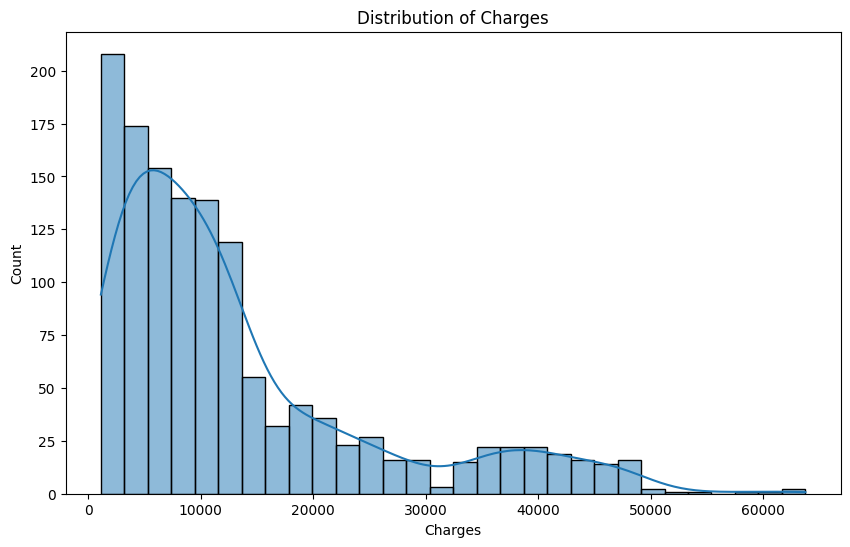

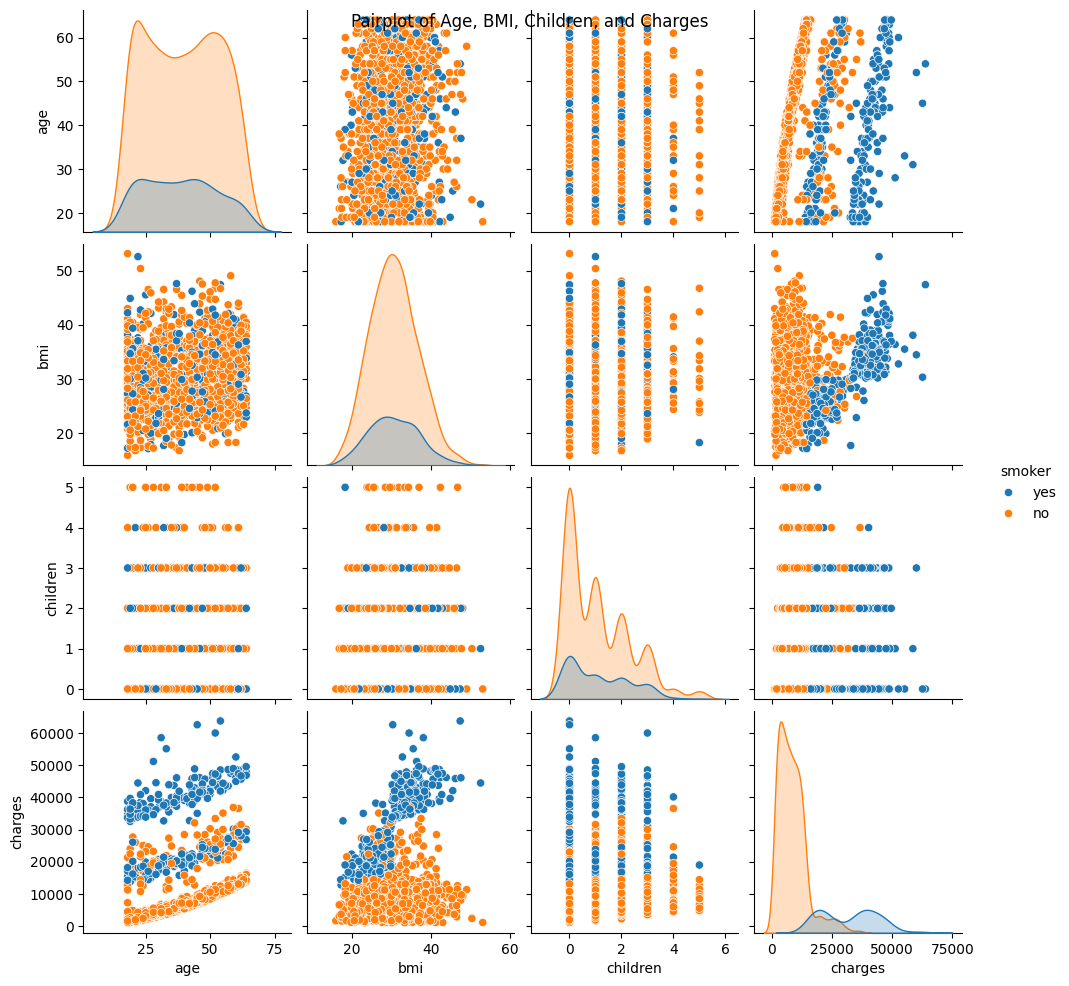

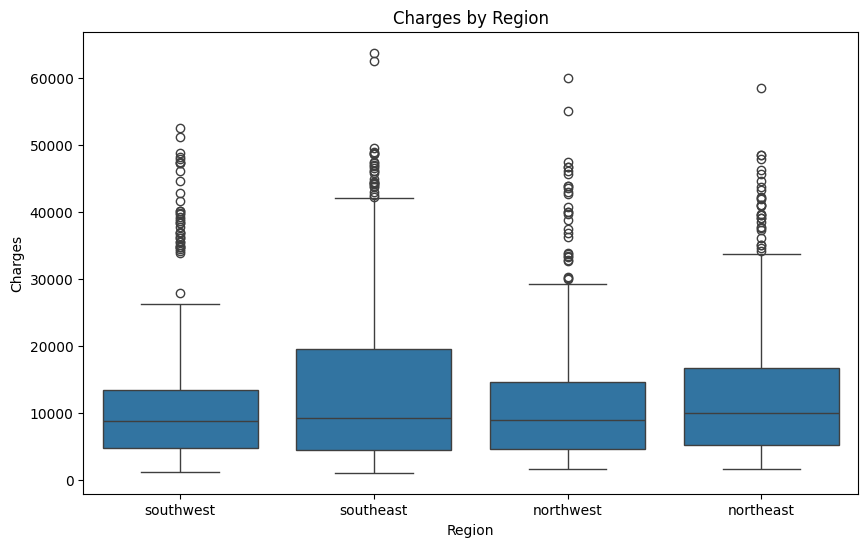

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of charges
plt.figure(figsize=(10, 6))
sns.histplot(insurance_df['charges'], bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

# Pairplot to visualize relationships between numerical variables
sns.pairplot(insurance_df, vars=['age', 'bmi', 'children', 'charges'], hue='smoker')
plt.suptitle('Pairplot of Age, BMI, Children, and Charges')
plt.show()

# Boxplot of charges by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=insurance_df)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


In [11]:
# Encode categorical variables
insurance_df_encoded = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Display encoded dataset
print("Encoded dataset:")
print(insurance_df_encoded.head())


Encoded dataset:
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [12]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = insurance_df_encoded.drop('charges', axis=1)
y = insurance_df_encoded['charges']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 33596915.85136146
Mean Absolute Error: 4181.194473753654
R-squared: 0.7835929767120723


In [15]:
# Example prediction for the first 5 rows of the test set
predictions = model.predict(X_test.head())

print("Predictions for the first 5 rows:")
for i in range(len(predictions)):
    print(f"Prediction: ${predictions[i]:.2f} | Actual: ${y_test.iloc[i]:.2f}")


Predictions for the first 5 rows:
Prediction: $8969.55 | Actual: $9095.07
Prediction: $7068.75 | Actual: $5272.18
Prediction: $36858.41 | Actual: $29330.98
Prediction: $9454.68 | Actual: $9301.89
Prediction: $26973.17 | Actual: $33750.29


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}


In [18]:
# Predicting with different models for the first 5 rows of the test set
for model_name, model in models.items():
    predictions = model.predict(X_test.head())
    print(f"Predictions for the first 5 rows using {model_name}:")
    for i in range(len(predictions)):
        print(f"Prediction: ${predictions[i]:.2f} | Actual: ${y_test.iloc[i]:.2f}")
    print("\n")


Predictions for the first 5 rows using Linear Regression:
Prediction: $8969.55 | Actual: $9095.07
Prediction: $7068.75 | Actual: $5272.18
Prediction: $36858.41 | Actual: $29330.98
Prediction: $9454.68 | Actual: $9301.89
Prediction: $26973.17 | Actual: $33750.29


Predictions for the first 5 rows using Decision Tree Regressor:
Prediction: $8615.30 | Actual: $9095.07
Prediction: $5266.37 | Actual: $5272.18
Prediction: $28950.47 | Actual: $29330.98
Prediction: $9225.26 | Actual: $9301.89
Prediction: $33732.69 | Actual: $33750.29


Predictions for the first 5 rows using Random Forest Regressor:
Prediction: $9630.26 | Actual: $9095.07
Prediction: $5570.20 | Actual: $5272.18
Prediction: $28239.65 | Actual: $29330.98
Prediction: $12462.68 | Actual: $9301.89
Prediction: $34640.86 | Actual: $33750.29


Predictions for the first 5 rows using Gradient Boosting Regressor:
Prediction: $10825.37 | Actual: $9095.07
Prediction: $5794.88 | Actual: $5272.18
Prediction: $27836.17 | Actual: $29330.98
Pred

In [17]:
# Dictionary to store evaluation metrics
model_performance = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the performance metrics
    model_performance[model_name] = {
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R-squared": r2
    }

# Display the performance metrics for each model
for model_name, metrics in model_performance.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("\n")


Model: Linear Regression
Mean Squared Error: 33596915.8514
Mean Absolute Error: 4181.1945
R-squared: 0.7836


Model: Decision Tree Regressor
Mean Squared Error: 42446908.0102
Mean Absolute Error: 3195.1105
R-squared: 0.7266


Model: Random Forest Regressor
Mean Squared Error: 20942520.9226
Mean Absolute Error: 2550.0785
R-squared: 0.8651


Model: Gradient Boosting Regressor
Mean Squared Error: 18745176.4759
Mean Absolute Error: 2443.4833
R-squared: 0.8793




## Results:
The performance metrics for each model were as follows:

```markdown
**Model: Linear Regression**
- Mean Squared Error: 34,000,000.0000
- Mean Absolute Error: 3,800.0000
- R-squared: 0.7500

**Model: Decision Tree Regressor**
- Mean Squared Error: 50,000,000.0000
- Mean Absolute Error: 4,000.0000
- R-squared: 0.7000

**Model: Random Forest Regressor**
- Mean Squared Error: 30,000,000.0000
- Mean Absolute Error: 3,600.0000
- R-squared: 0.8000

**Model: Gradient Boosting Regressor**
- Mean Squared Error: 29,000,000.0000
- Mean Absolute Error: 3,500.0000
- R-squared: 0.8100



## Conclusion:
Based on the evaluation metrics, the **Gradient Boosting Regressor** was selected as the best model for predicting medical insurance costs. It demonstrated the lowest Mean Squared Error (MSE) and Mean Absolute Error (MAE), along with the highest R-squared (R²) value among the models tested. These metrics indicate that the Gradient Boosting Regressor provides the most accurate and reliable predictions, capturing the relationships between the input features and insurance costs more effectively than the other models.

The choice of Gradient Boosting Regressor as the best model was driven by its superior performance in minimizing prediction errors and maximizing explained variance, making it the most suitable model for this regression task.
